# Organizing your code with functions

<img src="images/pestle.png" width="75" align="right">Years ago I learned to make Thai red curry paste from scratch, including roasting then grinding seeds and pounding stuff in a giant mortar and pestle. It takes forever and so I generally buy curry paste ready-made from the store.

<img src="images/redcurry.jpeg" width="70" align="right">Similarly, most cookbooks provide a number of fundamental recipes, such as making sauces, that are used by other recipes. A cookbook is organized into a series of executable recipes, some of which "invoke" other recipes. To make dinner, I open a cookbook, acquire some raw ingredients, then execute one or more recipes, usually in a specific sequence.

Writing a program proceeds in the same way. Opening a cookbook is the same as importing libraries. Acquiring raw ingredients could mean loading data into the memory. The main program  invokes functions (recipes) to accomplish a particular task. As part of writing a program, we will typically break out logical sections of code into functions specific to our problem, whereas the functions in libraries tend to be broadly-applicable. 

The way we organize our code is important. Programs quickly become an incomprehensible rats nest if we are not strict about style and organization. Here is the general structure of the Python programs we will write:

*import any libraries*<br>
*define any constants, simple data values*<br>
*define any functions*<br>
*main program body*

## Functions are subprograms

A sequence of operations grouped into a single, named entity is called a **function**. Functions are like mini programs or subprograms that we can plan out just like full programs.  

Python **programs** consist of zero or more functions and the so-called "main" program, consisting of a sequence of operations that gets the ball rolling.

Instead of loading data from the disk, functions operate on data given to them from the invoking program. This incoming data is analogous to a recipe's list of ingredients and is specified in the form of one or more named *parameters* (also called *arguments*). Instead of printing a result or displaying a graph, as a program would, functions *return* values. Functions are meant as helper routines that are generically useful.

We begin planning a function by identifying:
 
1. a descriptive function name
2. the kind of value(s) it operates on (parameter types)
3. the kind of value it returns (return type)
4. what the function does and the value it returns

If we can't specifying exactly what goes in and out of the function, there's no hope of determining the processing steps, let alone Python code, to implement that function.

As with a program's work plan, we then manually write out some sample function invocations to show what data goes in and what data comes out. 

Once we fully understand our goal, we plan out the sequence of operations needed by the function to compute the desired result.  As when designing a whole program, we start with the return value and work our way backwards, identifying operations in reverse order. Note: The operations should be purely a function of the data passed to them as parameters---functions should be completely ignorant of any other data. (More on this when we actually translate function pseudocode to Python.) 

## Function templates

Python functions are like black boxes that, in general, accept input data and yield (return) values. Each invocation of a function triggers the execution of the code associated with that function and returns a result value or values. For example, here is a function called `pi` that takes no parameters but returns value 3.14159 each time it is called:

In [2]:
def pi():
    return 3.14159

The code template for a function with no arguments is:

`def` *<ins>funcname</ins>*`()`:<br>
&nbsp;&nbsp;&nbsp;&nbsp;*<ins>statement 1</ins>*<br>
&nbsp;&nbsp;&nbsp;&nbsp;*<ins>statement 2</ins>*<br>
&nbsp;&nbsp;&nbsp;&nbsp;*...*<br>
&nbsp;&nbsp;&nbsp;&nbsp;`return` *<ins>expression</ins>*<br>

with holes for the function name, statements associated with a function, and an expression describing the return value. Functions that have no return value skip the `return` statement.

<img src="images/redbang.png" width="30" align="left"> The way that we associate statements with a function in Python is by indentation.  So `return 3.14159` is part of the function because it is indented after the function header. The first statement that begins in the same column as the `def` is first statement outside of the function.

In [3]:
def pi():
    return 3.14159
print("this is not part of function")

this is not part of function


<img src="images/redbang.png" width="30" align="left">*The Python interpreter does not execute the code inside the function unless we directly invoke that function.*  Python sees the function definition as just that: a "recipe" definition that we can call if we want.

The *definition* of a function is different than invoking  or *calling* a function. Calling a function requires the function name and any argument values. In this case, we don't have any arguments so we call the function as just `pi()`:

In [4]:
pi()

3.14159

In [5]:
pi

<function __main__.pi()>

We don't need a print statement because we are executing inside a notebook, not a Python program.  If this were in a regular Python program, we would need a print statement: `print(pi())`, but of course that also works here. 

Every invocation of that function evaluates to the value 3.14159.  The function `return`s a value but `print`s nothing. For example, Jupyter notebooks or the Python interactive shell does not print anything if we assign the result to variable:

In [6]:
x = pi()

In [7]:
x

3.14159

We distinguish between functions and variables syntactically by always putting the parentheses next to the function name. I.e., `pi` is a variable reference but `pi()` is a function call.

Some functions don't have return values, such as a function that displays an image in a window. It has a *side effect* of altering the display but does not really have a return value.  The `return` statement is omitted if the function does not return a value. Here's a contrived side-effecting example that does not need to return a value:

In [6]:
def hi():
    print('hi')

hi()

hi


If you try to use the value of a function that lacks a `return`, Python gives you the so-called `None` value.

In [7]:
x = hi()
print(x)

hi
None


Naturally, we can also return strings, not just numbers. For example here's a function called `hello` that does nothing but return string `'hello'`:

In [8]:
def hello():
    return "hello"

In [9]:
def parrt():
    return "parrt", 5707

id, phone = parrt()

print(id, phone)

parrt 5707


Turning to the more interesting cases now, here is the template for a function with one argument:

`def` *funcname*`(`*argname*`)`:<br>
&nbsp;&nbsp;&nbsp;&nbsp;*statement 1*<br>
&nbsp;&nbsp;&nbsp;&nbsp;*statement 2*<br>
&nbsp;&nbsp;&nbsp;&nbsp;*...*<br>
&nbsp;&nbsp;&nbsp;&nbsp;`return` *expression*<br>

If there are two arguments, the function header looks like:

`def` *funcname*`(`*argname1*, *argname2*`)`:<br>

Our job as programmers is to pick a descriptive function name, argument name(s), and statements within the function as per our function workplan.

**Invoking a function** with arguments looks like *funcname*`(`*expression*`)` or *funcname*`(`*expression1*`,` *expression2*`)` etc... The order of the arguments matters. Python matches the first expression with the first argument name given in the function definition.

Let's take a look at some of the code snippets from [Programming Patterns in Python](python-patterns.ipynb) and see if we can abstract some useful functions.

## Sum function

In [Model of Computation](computation.ipynb), we saw code to translate mathematical Sigma notation to python and so this code to sum the values in a list should be pretty familiar to you:

In [8]:
Quantity = [6, 49, 27, 30, 19, 21, 12, 22, 21]
sum = 0
for q in Quantity:
    sum = sum + q
print(sum)

207


This operation is accumulator and there is an associated code template, which you should memorize. Any time somebody says accumulator, you should think loop around a partial result update preceded by initialization of that result.

Summing values is very common so let's encapsulate the functionality in a function to avoid  having to cut-and-paste the code template all the time. Our black box with a few sample "input-output" pairs from a function plan looks like:

<img src="images/sum-func.png" width="180">

(Laying out the examples like that made us realize that we need to worry about empty lists.)

We group the summing functionality into a function by indenting it and then adding a function header:

In [9]:
def sum(data):
    s = 0
    for q in data:
        s = s + q
    return s # return accumulated value s to invoker (this is not a print statement!)

Quantity = [6, 49, 27, 30, 19, 21, 12, 22, 21]
s = sum(Quantity) # call sum with a specific list
print(s)
s = sum(data=Quantity) # implicit assignment here
print(s)

207
207


In [15]:
def sum(): # something is wrong here!
    s = 0
    for q in Quantity:
        s = s + q
    return s # this is not a print statement!

Quantity = [6, 49, 27, 30, 19, 21, 12, 22, 21]
s = sum() # call sum and save result
print(s)

207


The key benefit of this function version is that now we have some generic code that we can invoke with a simple call to `sum`. The argument to the function is the list of data to sum and so the for loop refers to it than the specific `Quantity` variable. (Notice that the variable inside the function is now `s` not `sum` to avoid confusion with the function name.) 

In [12]:
sum([1,2,3])

6

You might be tempted to build a function that directly references the `Quantity` global list instead of a parameter:

```python
# OMG, this is so horrible I find it difficult to type!
def sum():
    s = 0
    for q in Quantity:
        s = s + q
    return s
```

The problem is this function now only works with one list and is in no way generically useful. This defeats the purpose of creating the function because it's not reusable.
 
Since the real function accepts a list parameter, we can pass another list to the function:

In [13]:
ages = [10, 21, 13]
print(sum(ages))
print(sum([1,3,5,7,9]))
print(sum([ ])) # Empty list

44
25
0


Another thing to learn is that Python allows us to name the arguments as we passed them to a function:

In [14]:
sum(data=ages)

44

The function call, or invocation, `sum(Quantity)` passes the data to the function. The function returns a value and so the function call is considered to evaluate to a value, which we can print out as shown above. Like any value, we can assign the result of calling a function to a variable:

In [15]:
x = sum(Quantity)  # call sum and save result in x
x

207

Please remember that returning a value from a function is not the same thing as printing, which is a side-effect. Only the `print` statement prints a value to the console when running a program. *Don't confuse executing a program with the interactive Python console (or this notebook), which automatically prints out the value of each expression we type.* For example:

```python
>>> 34
34
>>> 34+100
134
>>> 
```

The `sum` function has one parameter but it's also common to have functions with two parameters.

### Exercise

Write a function called `neg` that takes one number parameter `x` and returns the negative of `x`.

In [16]:
def neg(x): return -x

### Exercise

Write a function called `add` the takes 2 number parameters, `x` and `y`, and returns the addition of the two parameters.

In [17]:
def max(x,y): return x if x>y else y

#same as:
#if x>y: return x
#else: return y

# test it
print(max(10,99))
print(max(99,10))

99
99


Notice that once we use the argument names, the order does not matter:

In [18]:
print(max(x=10, y=99))
print(max(y=99, x=10))

99
99


### Exercise

Write a function called `area` that takes a radius `r` parameter and returns the area of a circle with that radius (&pi;`r`<sup>2</sup>). Hint: Recall that the `math` package has a variable called `pi`.

In [19]:
import math
def area(r): return math.pi * r**2  # ** is the power operator

# test it
area(1), area(r=2)

(3.141592653589793, 12.566370614359172)

### Exercise

Write a Python function called `words` that accepts a string, `doc`, containing a sequence of words separated by a single space character and returns a list of words in lowercase. An argument of `'X Y z'` should return a list with value `['x', 'y', 'z']`. Hint: `'HI'.lower()` evaluates to `'hi'`.

In [20]:
def words(doc:str) -> list:
    words = doc.split(' ')
    return [w.lower() for w in words]

# OR

def words(doc):
    doc = doc.lower()
    return doc.split(' ')

# OR

def words(doc): return doc.lower().split(' ')

words('Terence Parr is the instructor of MSAN501')

['terence', 'parr', 'is', 'the', 'instructor', 'of', 'msan501']

## Search function

We've seen code to search for a list element, but the specific element and specific list were *hardcoded*.  That is to say, the code only worked with specific values and was not generic:

In [21]:
first=['Xue', 'Mary', 'Robert']     # our given input
target = 'Mary'                     # searching for Mary
index = -1
for i in range(len(first)):         # i is in range [0..n-1] or [0..n)
    if first[i]==target:
        index = i
        break
index

1

It would be nice to have a function we can call because searching is so common. To get started, we can just wrap the logic associated with searching in a function by indenting and adding a function header. But, we should also change the name of the list so that it is more generic and make it a parameter (same with the search target).

In [22]:
def search(x, data):
    index = -1
    for i in range(len(data)):         # i is in range [0..n-1] or [0..n)
        if data[i]==x:
            index = i
            break
    print(index)

first=['Xue', 'Mary', 'Robert']
search('Mary', first) # invoke search with 2 parameters

1


We are now passing two arguments to the function: `x` is the element to find and `data` is the list to search. Anytime we want, we can search a list for an element just by calling `search`:

In [23]:
search('Xue', first), search('Robert', first)

0
2


(None, None)

In [24]:
# It is a good idea to test the failure case
search('Jim', first)

-1


It turns out we can simplify that function by replacing the `break` statement with a `return` statement. Whereas a break statement breaks out of the immediately enclosing loop, the return statement returns from the function no matter where it appears in the function. In the current version, if we find the element, the `break` statement breaks out of the loop and forces the processor to execute the statement following the loop, which is the `return` statement. Because the return statement takes an expression argument, we don't need to track the index in a separate variable. *The `return` statement forces the processor to immediately exit the function and return the specified value.* In effect, then the `return` breaks out of the loop first then the function.

Here is the way the cool kids would write that function:

In [25]:
def search(x, data):
    for i in range(len(data)):  # i is in range [0..n-1] or [0..n)
        if data[i]==x:
            return i            # found element, return the current index i
    return -1                   # failure case; we did not return from inside loop

print(search('Mary', first))
print(search('Xue', first))
print(search('foo', first))

1
0
-1


## Visibility of symbols

Variables created outside of a function are so-called *global variables* because they live in the global space (or frame). For example, let's revisit the non-function version of the sum accumulator where I have added a call to lolviz library to display three global variables inside the loop:

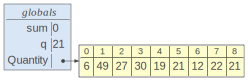

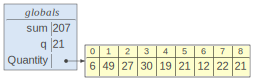

207

In [26]:
from lolviz import *

Quantity = [6, 49, 27, 30, 19, 21, 12, 22, 21]
sum = 0
display(callviz(varnames=['Quantity','sum','q']))
for q in Quantity:
    sum = sum + q
display(callviz(varnames=['Quantity','sum','q']))
sum

There are three (global) variables here: `Quantity`, `sum`, and `q`. The program uses all of those to compute the result.

Let's see what the "call stack" looks like using the function version of the accumulator.

In [27]:
reset -f

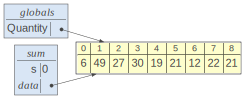

207

In [28]:
from lolviz import *
Quantity = [6, 49, 27, 30, 19, 21, 12, 22, 21]

def sum(data):
    s = 0
    display(callsviz(varnames=['Quantity','data','s']))
    for q in data:
        s = s + q
    return s

sum(Quantity)

As you can see, there is a new *scope* for the `sum` function because the main program invoked a function. That function has a parameter called `data` and a local variable called `s` (from where I have called the `callsviz` function).  Notice that both `Quantity` and `data` variables point at the same shared memory location!! It's just that the names are defined in different contexts (scopes). This is the aliasing of data we talked about in the last section. By traversing `data`, the `sum` function is actually traversing the `Quantity` list from the outer context. 

### Watch out for functions modifying data arguments

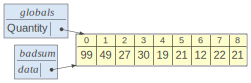

[99, 49, 27, 30, 19, 21, 12, 22, 21]


In [29]:
def badsum(data):
    #data = data.copy() # must manually make copy to avoid side-effect
    data[0] = 99
    display(callsviz(varnames=['Quantity','data','s']))
    s = 0
    for q in data:
        s = s + q
    return s

Quantity = [6, 49, 27, 30, 19, 21, 12, 22, 21]
badsum(Quantity)
print(Quantity)

When the function returns, the frame for `sum` disappears, leaving only the global frame.

300


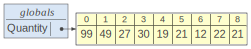

In [30]:
def sum(data):
    s = 0
    for q in data:
        s = s + q
    return s

print(sum(Quantity))
callsviz(varnames=['Quantity','data','s'])

In [31]:
reset -f

In [37]:
from IPython.display import HTML, display
from IPython.core.magic import register_line_cell_magic
import urllib

# Cool embedding thing from https://jupyter.brynmawr.edu/services/public/dblank/jupyter.cs/Examples/Online%20Python%20Tutor.ipynb
@register_line_cell_magic
def tutor(line, cell):
    code = urllib.parse.urlencode({"code": cell})
    display(HTML("""
    <iframe width="800" height="500" frameborder="0"
            src="http://pythontutor.com/iframe-embed.html#%s&py=2">
    </iframe>
    """ % code))

In [40]:
%%tutor
#from lolviz import *
def f(x):
    q = 0
    g(x)
    print("back from g")
#    display(callsviz(varnames=['x','q','y','z']))
    
def g(y):
    print(y)
#     display(callsviz(varnames=['x','q','y','z']))

z = 99
f(33)
print("back from f")
#display(callsviz(varnames=['x','q','y','z']))

### Visibility rules

Now that you have the idea of context in mind, let's establish some rules for the visibility of variables according to context:

* Main programs cannot see variables and arguments inside functions; just because a main program can call a function, doesn't mean it can see the inner workings. Think of functions as black boxes that take parameters and return values.
* Functions can technically see global variables but don't do this as a general rule.  Pass the global variables that you need to each function as arguments.

The latter rule is a good one because violating it generally means you're doing something "wrong". For example, if we tweak the `sum` accumulator function to refer directly to the global variable `Quantity`, we get:

```python
Quantity = [6, 49, 27, 30, 19, 21, 12, 22, 21]
def sum(data):         # parameter not used!
    s = 0
    for q in Quantity: # uh oh!
        s = s + q
    return s
```

The problem is that, now, `sum` only works on that global data. It's not generically useful. The clue is that the function ignores the `data` argument. So, technically the function can see global data, but it's not a good idea. (Violating this rule to alter a global variable is also a good way to get a subtle bug that's difficult to find.)

### Technically we need to see global symbols (functions)

In [33]:
def f():
    g()
    
def g():
    print("hi mom!")
    
f()

hi mom!


## Return values versus printing

Just to pound this concept into your heads...

One of the big confusion points for students is the difference between return values and printing results. We'll look at this again when we translate plans to Python code, but it's important to understand this difference right away. 

Programs in the analytics world typically read data from a file and emit output or write data to another file. In other words, programs interact with the world outside of the program.  The world outside of the program is usually the network, the disk, or the screen.  In contrast, most functions that we write won't interact with the outside world.  

<img src="images/redbang.png" width="30" align="left">Functions compute and return (give values back) to their caller. They don't print anything to the user unless explicitly asked to do so with a `print` statement.  

In [34]:
def pi():
    print(3.14159) # This is not a return statement!
    
print(pi())

3.14159
None
